In [204]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


df = pd.read_csv('test.csv')


In [205]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

This DataFrame consists of 1459 entries and 80 columns, with each row representing a specific instance of data and each column representing a particular attribute or feature. The 'Non-Null Count' column reveals the number of non-null values present in each attribute, indicating potential data completeness. However, several columns contain a considerable number of null values, suggesting potential data incompleteness or missing information. For example, columns like 'Alley', 'PoolQC', 'Fence', and 'MiscFeature' have a relatively low count of non-null values, implying a significant amount of missing data in those columns. Additionally, attributes like 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', and 'GarageCond' also have a notable number of null values. This DataFrame likely represents housing-related data, encompassing various features such as lot dimensions, building materials, and amenities. The presence of numerical features like 'LotFrontage', 'LotArea', and 'YearBuilt', alongside categorical variables like 'MSZoning', 'Street', and 'Utilities', suggests a diverse range of information pertaining to properties.

Let's see some descriptive statistics for the data set.

In [207]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


This table provides descriptive statistics for numeric columns in the DataFrame. Each row corresponds to a statistical measure calculated across all values in the respective column. For instance, 'count' represents the number of non-null values in each column, 'mean' signifies the average value, 'std' denotes the standard deviation, 'min' indicates the minimum value, '25%' represents the first quartile (25th percentile), '50%' is the median (50th percentile), and '75%' signifies the third quartile (75th percentile). The 'max' row displays the maximum value in each column. These statistics offer insights into the central tendency, dispersion, and range of values within each numerical attribute.

The analysis of the provided dataset reveals several insights. There are missing values in some columns, notably 'LotFrontage', suggesting incomplete data. Variability across columns varies, with some having high standard deviations indicating significant variability, while others exhibit less variation. The range of values varies widely across different columns, indicating diverse data distributions. Potential outliers are identified by comparing minimum and maximum values, such as the presence of outliers in the 'PoolArea' column. Temporal trends can be inferred from columns related to years, offering insights into changes over time. Additionally, the presence of zero values in certain columns, despite non-zero means, raises questions about missing data or specific property characteristics. Further exploration through visualization and statistical analysis is recommended to better understand the dataset and make informed decisions for subsequent processing or modeling.

Let's take a look at some zero PoolArea and LotArea.


In [208]:
df_PoolArea_zero = df[df.PoolArea == 0]

df_PoolArea_zero.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal


In the provided data subset, focusing on the 'PoolArea' column, entries with zero values are examined. Taking the first seven rows as an example, it's apparent that several properties have a 'PoolArea' value of zero, indicating the absence of a pool. For instance, in the first row, property Id 1461 has a 'PoolArea' of zero, suggesting no pool in that property. This pattern persists across multiple rows, reinforcing the notion that zero values in the 'PoolArea' column likely signify the absence of pools in the respective properties. Further investigation could involve cross-referencing this data with additional property features or external sources to validate these assumptions.



In [209]:
df_PoolArea_zero.count()

Id               1453
MSSubClass       1453
MSZoning         1449
LotFrontage      1226
LotArea          1453
                 ... 
MiscVal          1453
MoSold           1453
YrSold           1453
SaleType         1452
SaleCondition    1453
Length: 80, dtype: int64

The output above indicates the count of non-null values for each column in the DataFrame where the 'PoolArea' column has a value of zero. It suggests that out of 1459 entries, there are 1453 entries where 'PoolArea' is zero. Additionally, it shows the count of non-null values for other columns in the DataFrame, ranging from 1449 to 1459 depending on the column. This information helps in understanding the distribution of non-null values across different columns in the dataset where 'PoolArea' is zero.

In [210]:
df_PoolArea_0count = df.groupby('PoolArea')[['Id']].count()

print(df_PoolArea_0count)

            Id
PoolArea      
0         1453
144          1
228          1
368          1
444          1
561          1
800          1


The output above indicates the count of entries grouped by the 'PoolArea' column. It shows that there are 1453 entries with a 'PoolArea' value of zero, while the rest have different values ranging from 144 to 800. This analysis helps in understanding the distribution of entries based on the presence or absence of pool areas, with the majority having no pool area.

I count the zero value in the PoolArea cloumn and there are 1453 rows in zero value. In case I drop too many raw data to keep the data integrity, I decide to retain these rows and replace zero values with null values.

So does the LotArea column.

In [211]:
df_LotArea_0count = df.groupby('LotArea')[['Id']].count()
print(df_LotArea_0count)

         Id
LotArea    
1470      1
1476      1
1477      1
1484      1
1488      1
...      ..
47007     1
47280     1
50102     1
51974     1
56600     1

[1106 rows x 1 columns]


This output indicates the count of occurrences for each unique value in the 'LotArea' column of the DataFrame. Each row represents a unique lot area value along with the count of how many times that value appears in the dataset. For example, there is one occurrence of a lot area of 1470 square units, one occurrence of 1476 square units, and so on. The total number of unique lot area values is 1106.

It's just has a small number of zero value rows in runtime column, so I decide to drop them.

Finally, let's investigate the ScreenPorch column to decide whether drop zero or just replace it with null value

In [212]:
df_ScreenPorch_0count = df.groupby('ScreenPorch')[['Id']].count()
print(df_ScreenPorch_0count)

               Id
ScreenPorch      
0            1319
64              1
84              1
88              1
92              2
...           ...
322             1
342             1
348             1
490             1
576             1

[75 rows x 1 columns]


This output presents the count of occurrences for each unique value in the 'ScreenPorch' column of the DataFrame. Each row represents a unique screen porch area value along with the count of how many times that value appears in the dataset. For instance, there are 1319 instances where the screen porch area is 0 square units, one occurrence of 64 square units, one of 84 square units, and so forth. In total, there are 75 unique screen porch area values.

I count the zero value in the PoolArea cloumn and there are 1319 rows in zero value. In case I drop too many raw data to keep the data integrity, I decide to retain these rows and replace zero values with null values.

In [213]:
#count zero values in Alley data using groupby

null_alley_count = df.groupby(df['Alley'].isnull()).size()


print("Number of rows with null value in Alley column:")
print(null_alley_count)


Number of rows with null value in Alley column:
Alley
False     107
True     1352
dtype: int64


if we look at the data, Alley column has 1352 null rows, which is a very huge number.We can drop the column as this is significantly empty.

# Data Cleaning

In [214]:
#Dropping columns 

col = ["Id", "LotShape", "LotConfig", "Neighborhood"]
df.drop(col, axis = 1, inplace = True)

#Checking if columns are dropped
df.head(1)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Condition1,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Lvl,AllPub,Gtl,Feedr,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal



intially we started with 80 columns and then we have dropped 4 columns, now we are left with 76 columns



In [215]:
#Now we will drop the duplicates
df.drop_duplicates(inplace = True)
df.head(1)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Condition1,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Lvl,AllPub,Gtl,Feedr,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [216]:
#Dropping null values in some columns- Street, AlleyOpenPorchSF,EnclosedPorch,3SsnPorch
cal2 = ["LotArea", "YearBuilt", "OverallQual","TotalBsmtSF","GarageArea"]
df.dropna(subset = cal2, how = "any", inplace = True)



In [217]:
#Checking if nulls are dropped
df.isnull().sum()


MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 76, dtype: int64


AS we can see, there are two more columns which have null values, "Fence" and "LotFrontage".Now we can write a code to update that and make our data free from null values.


In [218]:
#Rplacing 0 values with null values
df["PoolArea"] = df["PoolArea"].replace(0, np.NaN)
df["ScreenPorch"] = df["ScreenPorch"].replace(0, np.NaN)


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1457 non-null   int64  
 1   MSZoning       1453 non-null   object 
 2   LotFrontage    1230 non-null   float64
 3   LotArea        1457 non-null   int64  
 4   Street         1457 non-null   object 
 5   Alley          107 non-null    object 
 6   LandContour    1457 non-null   object 
 7   Utilities      1455 non-null   object 
 8   LandSlope      1457 non-null   object 
 9   Condition1     1457 non-null   object 
 10  Condition2     1457 non-null   object 
 11  BldgType       1457 non-null   object 
 12  HouseStyle     1457 non-null   object 
 13  OverallQual    1457 non-null   int64  
 14  OverallCond    1457 non-null   int64  
 15  YearBuilt      1457 non-null   int64  
 16  YearRemodAdd   1457 non-null   int64  
 17  RoofStyle      1457 non-null   object 
 18  RoofMatl     

In [220]:

#Dropping null values in some columns(2)
cal2 = ["LotFrontage","Fence"]
df.dropna(subset = cal2, how = "any", inplace = True)
df.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

Now we can see, there is no null value in our remaining 76 columns.



After the filterinh we can we 2 columns are filled with null values, we can eleminate those two columns for cleaning



In [221]:
#filtering ID data with non zero vlaues
df = df[df.OverallCond!= 0]
df.query("OverallCond == 0")


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Condition1,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


# Cleaning Result Summary
In this database we had multiple columns with null values. we have dropped few columns which were mostly filled with null values. then we replaced 0 with null values so it becomes easier for us to remove null values as python has built in libraries to get rid of null values which is really crucial for data cleaning. Now we have data with 76 columns and 16 entires.



In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 1457
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     241 non-null    int64  
 1   MSZoning       241 non-null    object 
 2   LotFrontage    241 non-null    float64
 3   LotArea        241 non-null    int64  
 4   Street         241 non-null    object 
 5   Alley          16 non-null     object 
 6   LandContour    241 non-null    object 
 7   Utilities      241 non-null    object 
 8   LandSlope      241 non-null    object 
 9   Condition1     241 non-null    object 
 10  Condition2     241 non-null    object 
 11  BldgType       241 non-null    object 
 12  HouseStyle     241 non-null    object 
 13  OverallQual    241 non-null    int64  
 14  OverallCond    241 non-null    int64  
 15  YearBuilt      241 non-null    int64  
 16  YearRemodAdd   241 non-null    int64  
 17  RoofStyle      241 non-null    object 
 18  RoofMatl      

In [223]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,...,241.000000,241.000000,241.000000,241.000000,241.000000,35.000000,3.000000,241.000000,241.000000,241.000000
mean,50.145228,67.609959,9324.535270,5.423237,6.000000,1954.680498,1972.319502,50.435685,420.580913,70.593361,...,393.481328,90.095436,35.547718,36.784232,2.713693,183.400000,576.333333,72.365145,6.016598,2007.875519
std,39.982804,20.426019,4368.405644,0.946110,1.251666,23.231301,18.857182,131.870663,374.815247,191.265219,...,182.392482,137.089703,65.111049,76.373337,26.809610,87.507378,216.407794,489.476557,2.666094,1.351335
min,20.000000,21.000000,1488.000000,3.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,368.000000,0.000000,1.000000,2006.000000
25%,20.000000,57.000000,7130.000000,5.000000,5.000000,1940.000000,1955.000000,0.000000,68.000000,0.000000,...,280.000000,0.000000,0.000000,0.000000,0.000000,123.500000,464.500000,0.000000,4.000000,2007.000000
50%,45.000000,67.000000,9000.000000,5.000000,6.000000,1956.000000,1969.000000,0.000000,384.000000,0.000000,...,364.000000,0.000000,0.000000,0.000000,0.000000,165.000000,561.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,10682.000000,6.000000,7.000000,1971.000000,1991.000000,0.000000,658.000000,0.000000,...,495.000000,170.000000,46.000000,40.000000,0.000000,200.000000,680.500000,0.000000,7.000000,2009.000000
max,190.000000,200.000000,43500.000000,9.000000,9.000000,2005.000000,2009.000000,1224.000000,2158.000000,1164.000000,...,1488.000000,690.000000,382.000000,429.000000,360.000000,576.000000,800.000000,6500.000000,12.000000,2010.000000


# Explotary Data Analysis

# Question 1: Sold Lot Areas Over the Years

In [224]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Condition1,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Lvl,AllPub,Gtl,Feedr,...,120.0,NaN,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,Lvl,AllPub,Gtl,Norm,...,NaN,NaN,NaN,MnPrv,NaN,0,3,2010,WD,Normal


compute the mean sold lot Area by year

In [225]:
df["LotArea"] = pd.to_numeric(df["LotArea"], errors="coerce")

larea_mean = df.groupby("YrSold")["LotArea"].mean()
print(larea_mean.tail())


YrSold
2006    9662.085106
2007    9567.066667
2008    8838.400000
2009    9280.500000
2010    9148.457143
Name: LotArea, dtype: float64


compute the median sold lot Area by year

In [226]:
df["LotArea"] = pd.to_numeric(df["LotArea"], errors="coerce")

larea_median = df.groupby("YrSold")["LotArea"].median()

print(larea_median.tail())


YrSold
2006    9576.0
2007    8264.5
2008    8094.0
2009    9446.5
2010    9600.0
Name: LotArea, dtype: float64


Median data for lot area sold over years looks smoother.

In [227]:
#Index loc for x-axis
index_mean = larea_mean.index
index_median = larea_median.index


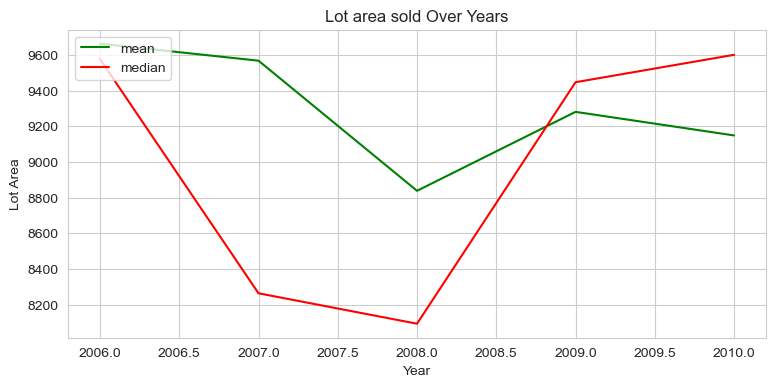

In [228]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, larea_mean
x2, y2 = index_median, larea_median
#set size
plt.figure(figsize=(9, 4))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'g', label = 'mean')
plt.plot(x2, y2, color = 'r', label = 'median')
#set title and labels
plt.title('Lot area sold Over Years')
plt.xlabel('Year')
plt.ylabel('Lot Area');
#set legend
plt.legend(loc='upper left')



It visualizes trends in total lot area sold. The green line shows how the average (mean) lot area I sold fluctuated over several years (2006 - 2010). The graph doesn't reveal a clear upward or downward trend in the total area sold on average. This suggests that the average lot size may not be consistently increasing or decreasing over time.
The red line depicts the median lot area I sold for each year. The median represents the "middle" value, meaning half the lots I sold were larger than this area and half were smaller. By comparing the green and red lines, I can see if the distribution of lot sizes leans towards larger or smaller areas. For instance, if the red line consistently falls below the green line, it might indicate that a larger portion of lots I sold were smaller than the average size.


# Question2 : The distribution of Overall Condition in different decades


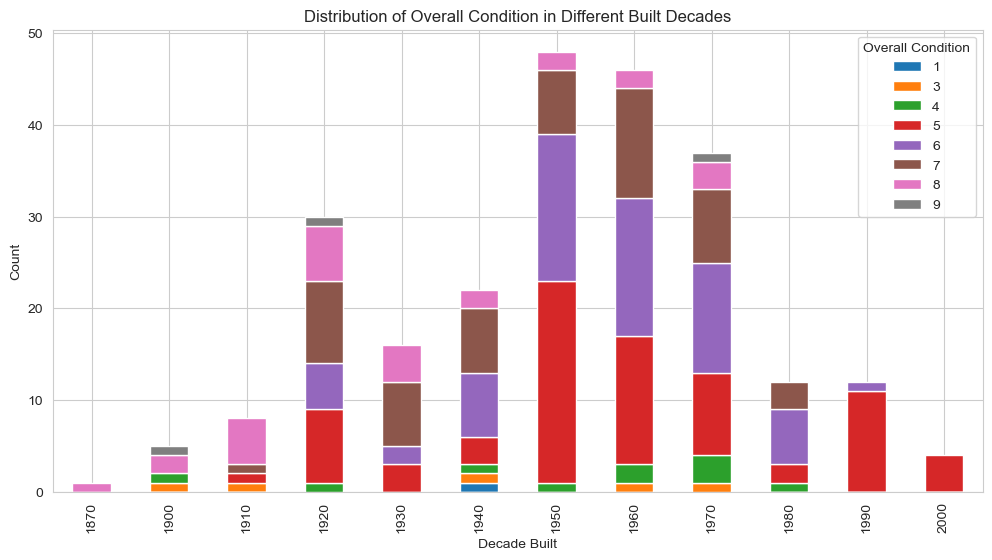

In [229]:
df['DecadeBuilt'] = (df['YearBuilt'] // 10) * 10

grouped = df.groupby(['DecadeBuilt', 'OverallCond']).size()

unstacked = grouped.unstack()

unstacked.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Overall Condition in Different Built Decades')
plt.xlabel('Decade Built')
plt.ylabel('Count')
plt.legend(title='Overall Condition')
plt.show()

The graph titled "Distribution of Overall Condition in Different Built Decades" is a stacked bar chart that presents the condition ratings of buildings across various decades of construction, from the 1870s to the 2000s. Each bar represents a decade, and the colors within each bar correspond to different overall condition ratings, ranging from 1 (poor condition) to 9 (excellent condition). The y-axis, labeled "Count," indicates the number of buildings that fall into each condition category per decade, with counts ranging up to a maximum of 50.
In this graph, we see significant variability in the distribution of building conditions across the decades. The earliest decades, from the 1870s to the 1930s, show lower total counts, which could be attributed to fewer surviving records or buildings from those periods. As we move towards later decades, from the 1940s to the 1980s, there's a noticeable increase in the count of buildings and a broader distribution of conditions, with condition ratings 4, 5, and 7 being particularly prevalent. This suggests that buildings from these decades are more likely to have been preserved or documented.

Plotting unstacked bar grapg of the overall condition but in different decades

#unstacked plot

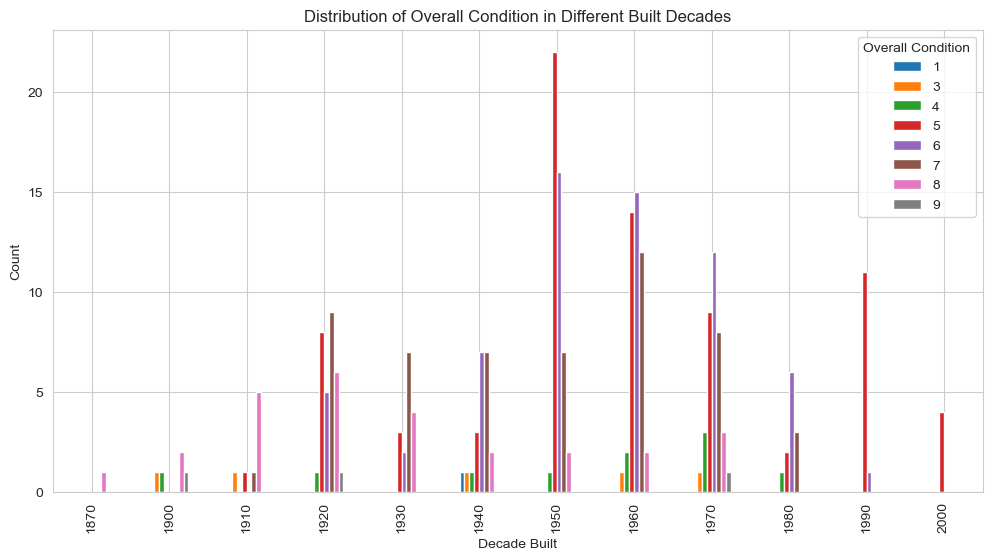

In [230]:
unstacked.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Distribution of Overall Condition in Different Built Decades')
plt.xlabel('Decade Built')
plt.ylabel('Count')
plt.legend(title='Overall Condition')
plt.show()


This graph provides a visual representation of the condition ratings for buildings constructed over a span from the 1870s to the 2000s. Unlike the previously discussed graph, this version employs a regular bar chart, where each condition rating within a decade is represented by a distinct bar and color, without stacking.

Here,each bar represents a specific overall condition rating (from 1 to 9, with some ratings missing such as 2 and 3) for buildings constructed in a particular decade. The x-axis organizes these buildings by the decade of construction, and the y-axis, with a scale ranging from 0 to a maximum of 20, measures the count of buildings falling into each condition category per decade.

A detailed look at the graph reveals significant fluctuations in the count and distribution of condition ratings across decades. For instance, there are noticeable peaks in certain condition ratings during specific decades, such as a high number of buildings rated condition 9 in the 1970s and 2000s, suggesting periods during which buildings with excellent conditions were more prevalent or better recorded. Conversely, the earlier decades like the 1870s and 1900s exhibit lower overall counts, which may indicate less comprehensive data or lower survival rates of records or buildings.

Plotting the major condition values (4-7)

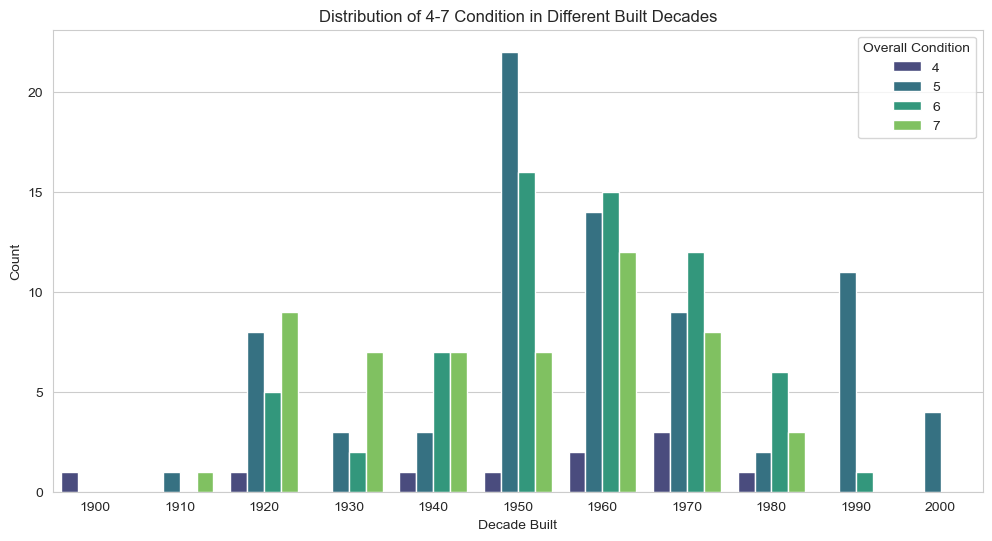

In [231]:
df_filtered = df[(df['OverallCond'] >= 4) & (df['OverallCond'] <= 7)]


plt.figure(figsize=(12, 6))
sns.countplot(x='DecadeBuilt', hue='OverallCond', data=df_filtered, palette='viridis')

plt.title('Distribution of 4-7 Condition in Different Built Decades')
plt.xlabel('Decade Built')
plt.ylabel('Count')
plt.legend(title='Overall Condition')
plt.show()

Here, this is a multi-bar chart displaying the condition ratings of buildings from the 1900s to the 2000s, focusing specifically on condition ratings between 4 and 7. Each bar in the graph represents the count of buildings that fall into one of these condition ratings during each respective decade.

On the x-axis, the decades are laid out chronologically, starting from the 1900s and ending in the 2000s. This axis groups the data by the decade in which the buildings were constructed, allowing for a historical overview of building conditions over time. The y-axis is labeled "Count" and quantifies the number of buildings assessed in each condition rating for the corresponding decade, with values ranging up to 20.

In this graph, each condition rating (4, 5, 6, 7) is represented by a different color. The separate bars for each decade allow for an easy comparison of the frequency of each condition rating across time, showing how different decades compared in terms of building condition within this range.

Plotting a line graph of the overall condition but in different decades

# Line plot

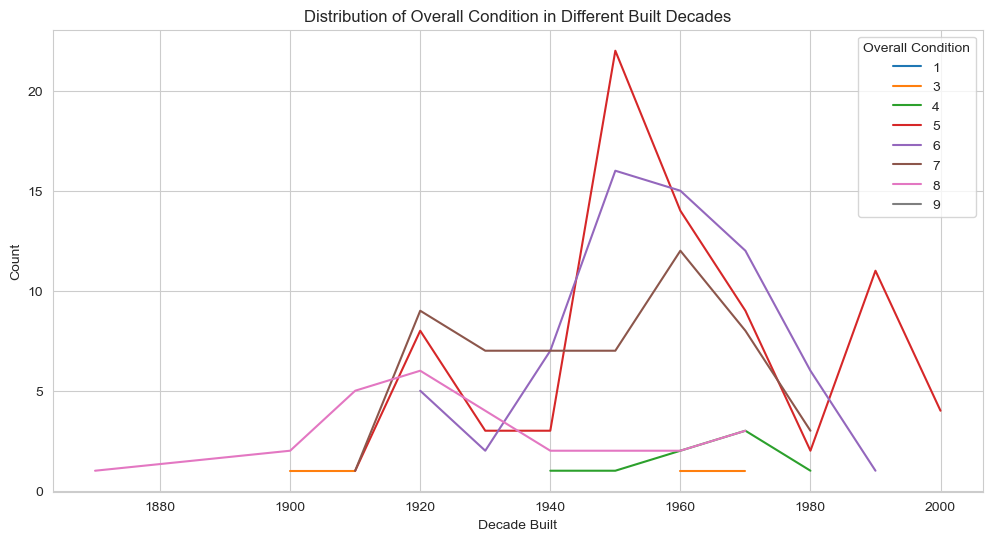

In [232]:
unstacked.plot(kind='line', figsize=(12, 6))
plt.title('Distribution of Overall Condition in Different Built Decades')
plt.xlabel('Decade Built')
plt.ylabel('Count')
plt.legend(title='Overall Condition')
plt.show()

This graph  displays a line chart format that provides a dynamic overview of how the overall condition of buildings varies across different decades of construction, from the 1880s to the 2000s. Each line represents a different condition rating, ranging from 1 (indicating very poor condition) to 9 (indicating excellent condition), with the y-axis showing the count of buildings assigned each condition rating.

This visualization is particularly effective in depicting trends over time for each condition rating. For instance, the graph shows a notable peak in buildings rated as condition 5 and 6 during the 1920s, suggesting a high volume of buildings from this era were considered to be in average condition. Another significant observation is the sharp rise and subsequent fall in buildings rated condition 9 around the 1960s, indicating a period during which a high number of buildings were perceived as being in excellent condition.

# Question 3: The distribution of total basement area ('TotalBsmtSF') across different levels of overall material and finish quality ('OverallQual') in the last 5 years



In [233]:

df_last_5_years = df[df['YrSold'] >= df['YrSold'].max() - 5]



In [234]:
# Step 2: Group the data by 'OverallQual'
grouped_data = df_last_5_years.groupby('OverallQual')


In [235]:
# Step 3: Calculate summary statistics of 'TotalBsmtSF' for each level of 'OverallQual'
summary_stats = grouped_data['TotalBsmtSF'].describe()


<Figure size 1000x600 with 0 Axes>

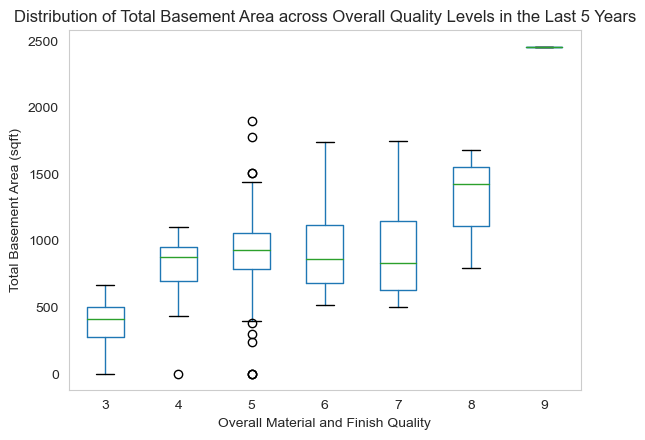

In [236]:
# Step 4: Visualize the distribution using box plots
plt.figure(figsize=(10, 6))
boxplot = df_last_5_years.boxplot(column='TotalBsmtSF', by='OverallQual', grid=False)
plt.title('Distribution of Total Basement Area across Overall Quality Levels in the Last 5 Years')
plt.xlabel('Overall Material and Finish Quality')
plt.ylabel('Total Basement Area (sqft)')
plt.suptitle('')
plt.show()

Here, this box plot  illustrates the relationship between the total basement area (in square feet) and the overall material and finish quality of buildings, which is rated on a scale from 3 to 9. Each box plot represents the spread and central tendency of basement areas for buildings within a specific quality level.

On the x-axis, the "Overall Material and Finish Quality" is represented by numerical values ranging from 3 to 9, where a higher number indicates better quality. The y-axis measures the "Total Basement Area" in square feet, with the scale extending from 0 to 2500 square feet.

Each box in the plot shows the interquartile range (IQR) of the basement area, marking the 25th percentile (bottom of the box), the median (the line within the box), and the 75th percentile (top of the box) for each quality level. The "whiskers" of each box extend to the smallest and largest values within 1.5 times the IQR from the quartiles, providing a sense of variability outside the middle 50% of data. Points depicted as circles outside the whiskers represent outliers, indicating observations that fall outside this range.

In [237]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch'

In [238]:
# Sort the DataFrame 'df' based on the values in the 'GarageArea' column in descending order
# Store the sorted DataFrame in the variable 'sorted_df'
sorted_df = df.sort_values(by='GarageArea', ascending=False)




In [239]:
top_100_biggest_garage_area = sorted_df.head(100)

In [240]:
# dataset according top 100 largest garage area.
top_100_biggest_garage_area

top = top_100_biggest_garage_area.copy()


In [241]:
top.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Condition1,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,DecadeBuilt
611,50,RL,60.0,10836,Pave,Grvl,Lvl,AllPub,Gtl,Norm,...,NaN,NaN,GdWo,NaN,0,6,2008,WD,Normal,1920
1139,20,RL,200.0,43500,Pave,NaN,Lvl,AllPub,Gtl,Artery,...,561.0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,1950


# How does the distribution of the top three most common values for 'GarageYrBlt', 'MSSubClass', 'LotArea', and 'OverallQual' vary across these columns?

Define a function to find the top three values in a Series

In [242]:
def find_top(series):
    return series.value_counts().nlargest(3).index.tolist()

In [243]:
# Find the top three values for each column
top_GarageYrBlt = find_top(top['GarageYrBlt'])
top_MSSubClass = find_top(top['MSSubClass'])
top_LotArea = find_top(top['LotArea'])
top_OverallQual = find_top(top['OverallQual'])


In [244]:
# Define the data for the summary table
data = {
    'GarageYrBlt': top_GarageYrBlt,
    'MSSubClass': top_MSSubClass,
    'LotArea': top_LotArea,
    'OverallQual': top_OverallQual
}


In [245]:
# Create the summary DataFrame
summary_df = pd.DataFrame(data)

# Display the summary DataFrame
summary_df


,GarageYrBlt,MSSubClass,LotArea,OverallQual
0,1977.0,20,6000,6
1,1980.0,50,9720,5
2,1966.0,60,9000,7


We're analyzing the distribution of the top three most common values for the columns 'GarageYrBlt', 'MSSubClass', 'LotArea', and 'OverallQual' from a DataFrame called top.

We start by defining a function find_top that takes a Series and returns the top three most common values as a list. We then apply this function to each column to find the top values.

Next, we create a summary DataFrame summary_df using the top values found for each column. This DataFrame will have the top three values for each of the specified columns.

Finally, we set up a 2x2 subplot layout for our plots using plt.subplots(2, 2, figsize=(15, 10)). We then create count plots for each column to visualize the distribution of these top values using Seaborn's sns.countplot. Each plot is titled according to the column name and shows the count of occurrences for each of the top three values. The plots are displayed using plt.show().


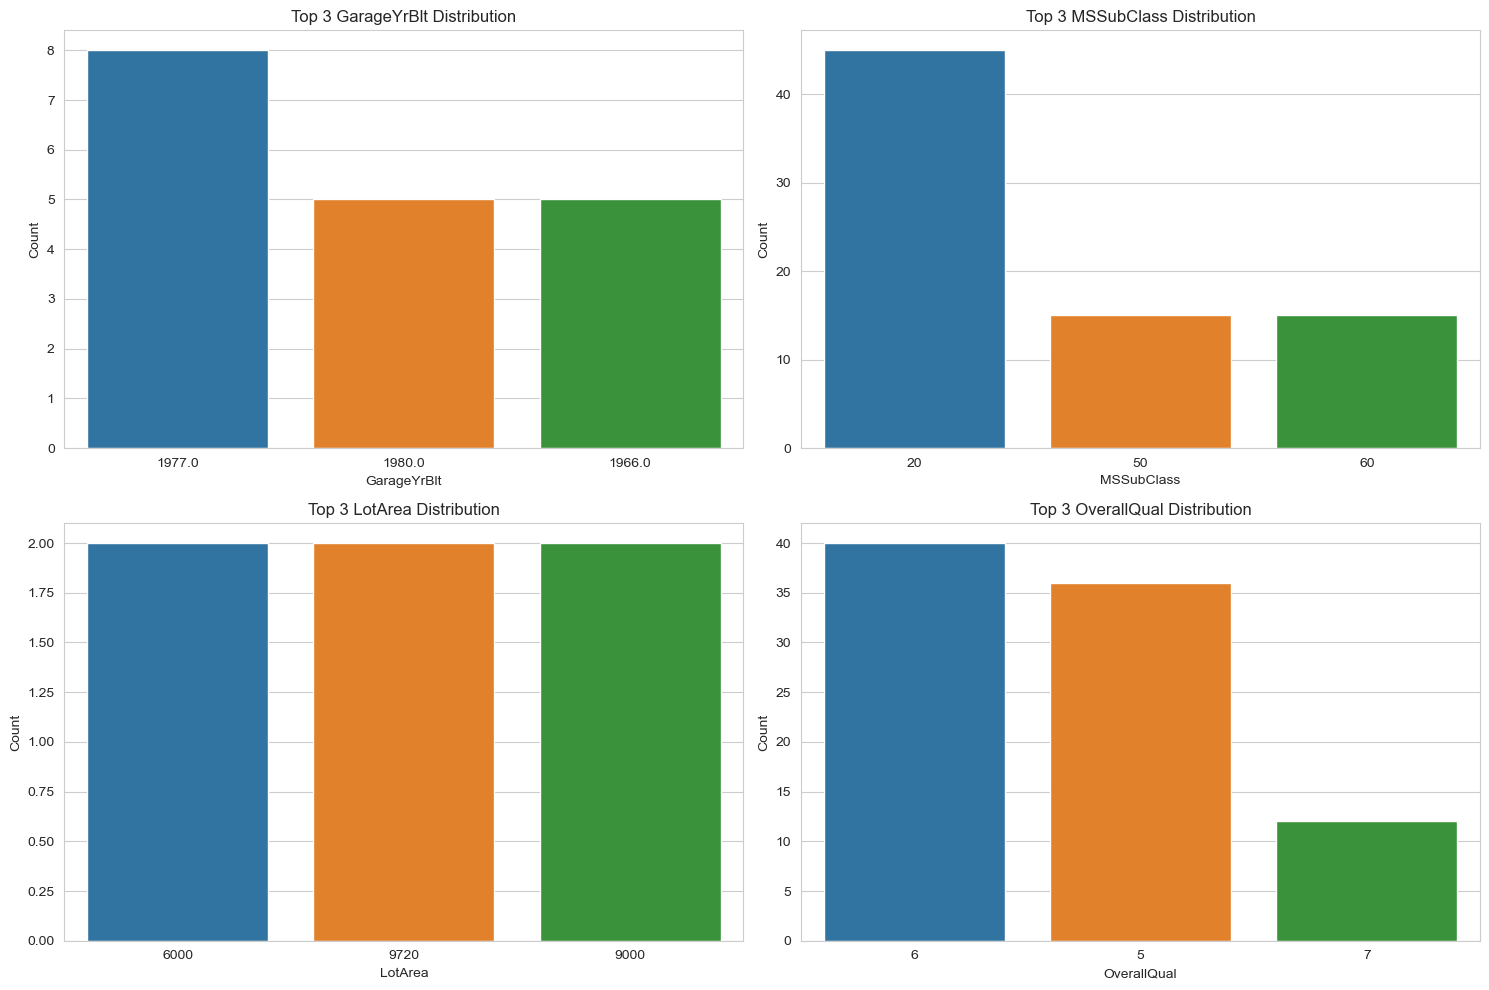

In [246]:

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'GarageYrBlt'
sns.countplot(x='GarageYrBlt', data=top, order=top_GarageYrBlt, ax=axes[0, 0])
axes[0, 0].set_title('Top 3 GarageYrBlt Distribution')
axes[0, 0].set_xlabel('GarageYrBlt')
axes[0, 0].set_ylabel('Count')

# Plot for 'MSSubClass'
sns.countplot(x='MSSubClass', data=top, order=top_MSSubClass, ax=axes[0, 1])
axes[0, 1].set_title('Top 3 MSSubClass Distribution')
axes[0, 1].set_xlabel('MSSubClass')
axes[0, 1].set_ylabel('Count')

# Plot for 'LotArea'
sns.countplot(x='LotArea', data=top, order=top_LotArea, ax=axes[1, 0])
axes[1, 0].set_title('Top 3 LotArea Distribution')
axes[1, 0].set_xlabel('LotArea')
axes[1, 0].set_ylabel('Count')

# Plot for 'OverallQual'
sns.countplot(x='OverallQual', data=top, order=top_OverallQual, ax=axes[1, 1])
axes[1, 1].set_title('Top 3 OverallQual Distribution')
axes[1, 1].set_xlabel('OverallQual')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

This graph have total four bar charts, each illustrating the distribution of different property features within a real estate dataset. The first chart focuses on the distribution of the year garages were built, showcasing 1977, 1980, and 1966 as the most common years. The year 1977 stands out with the highest count, indicating a peak in garage constructions or renovations during that year. The second chart details the frequency of three building classes (20, 50, 60) under the MSSubClass classification, with class 20 dominating significantly, suggesting a prevalence of this type of building style or utility during the captured time frame. The third chart compares the lot areas, with 6000, 9720, and 9000 square feet being the most common. The counts are fairly similar across these sizes, reflecting a standardization in lot dimensions for properties within the dataset. Lastly, the fourth chart depicts the overall quality ratings of properties, with quality level 6 being the most frequent followed by 5 and then 7, pointing to a moderate to good quality standard among the surveyed buildings. Overall, these charts provide a concise visualization of key aspects of property features, highlighting common trends and outliers in construction years, building types, lot sizes, and quality ratings, which are invaluable for real estate analysis and planning.

# How do the most frequently recurring values for 'GarageYrBlt', 'MSSubClass', 'LotArea', and 'OverallQual' compare among the 100 entries with the smallest garage areas in the dataset?

Define a function to find the top three occurrences in a Series

In [247]:
def find_top_occurrences(series):
    return series.value_counts().nlargest(3)

In [248]:
#Find the 100 smallest garage area entries
df_smallest_garage_area = df.nsmallest(100, 'GarageArea')

In [249]:
# Find the top three occurrences for each column
top_occurrences_GarageYrBlt = find_top_occurrences(df_smallest_garage_area['GarageYrBlt'])
top_occurrences_MSSubClass = find_top_occurrences(df_smallest_garage_area['MSSubClass'])
top_occurrences_LotArea = find_top_occurrences(df_smallest_garage_area['LotArea'])
top_occurrences_OverallQual = find_top_occurrences(df_smallest_garage_area['OverallQual'])

In [250]:
df_summary = pd.DataFrame({
    'Top 3 GarageYrBlt': top_occurrences_GarageYrBlt.index.tolist(),
    'Top 3 MSSubClass': top_occurrences_MSSubClass.index.tolist(),
    'Top 3 LotArea': top_occurrences_LotArea.index.tolist(),
    'Top 3 OverallQual': top_occurrences_OverallQual.index.tolist()
})


In [251]:
df_summary_transposed = df_summary.T

df_summary_transposed

,0,1,2
Top 3 GarageYrBlt,1926.0,1954.0,1920.0
Top 3 MSSubClass,20.0,50.0,30.0
Top 3 LotArea,6000.0,7000.0,7200.0
Top 3 OverallQual,5.0,6.0,4.0


In this analysis, we focus on comparing the top three most frequently occurring values for 'GarageYrBlt', 'MSSubClass', 'LotArea', and 'OverallQual' among the 100 entries with the smallest garage areas in the dataset. First, we identify the 100 entries with the smallest garage areas using nsmallest(100, 'GarageArea') and store them in a DataFrame called df_smallest_garage_area. Next, we find the top three occurrences for each column in this subset and store them in respective variables. We then construct a summary DataFrame containing these top occurrences. Using Seaborn's countplot, we visualize the distribution of the top three values for each column across the entire dataset, filtering for entries that match the top occurrences in the subset. This analysis provides insights into how these key attributes vary among the properties with the smallest garage areas, offering potential insights into the relationships between garage size and other property features.


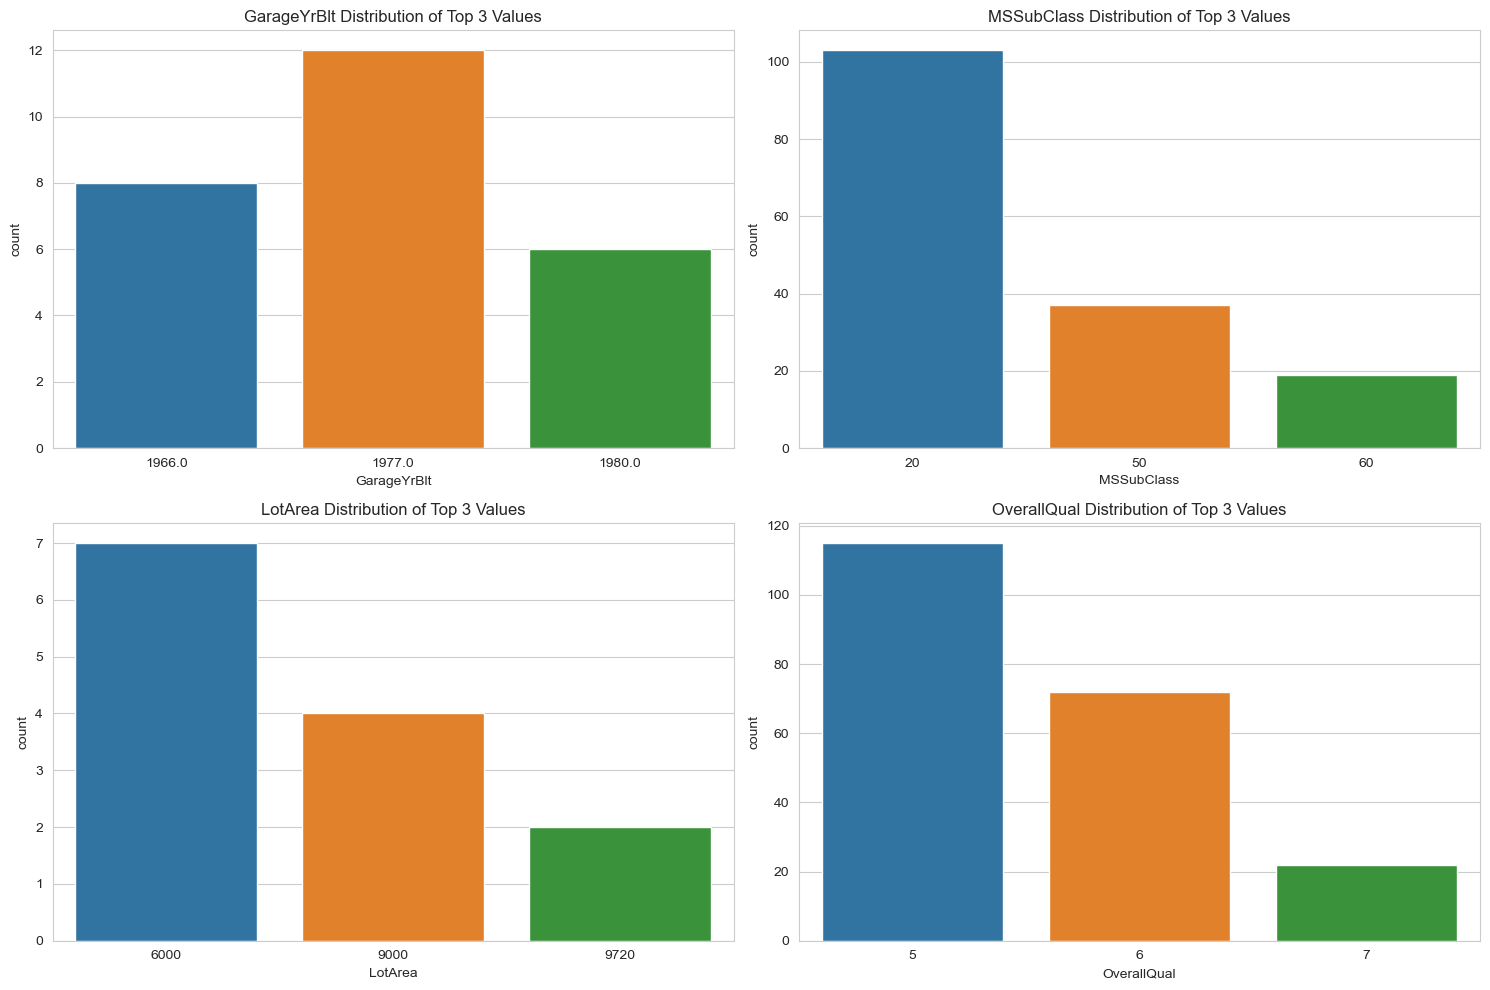

In [252]:
# Create subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'GarageYrBlt'
sns.countplot(x='GarageYrBlt', data=df[df['GarageYrBlt'].isin(top_GarageYrBlt)], ax=axes[0, 0])
axes[0, 0].set_title('GarageYrBlt Distribution of Top 3 Values')

# Plot for 'MSSubClass'
sns.countplot(x='MSSubClass', data=df[df['MSSubClass'].isin(top_MSSubClass)], ax=axes[0, 1])
axes[0, 1].set_title('MSSubClass Distribution of Top 3 Values')

# Plot for 'LotArea'
sns.countplot(x='LotArea', data=df[df['LotArea'].isin(top_LotArea)], ax=axes[1, 0])
axes[1, 0].set_title('LotArea Distribution of Top 3 Values')

# Plot for 'OverallQual'
sns.countplot(x='OverallQual', data=df[df['OverallQual'].isin(top_OverallQual)], ax=axes[1, 1])
axes[1, 1].set_title('OverallQual Distribution of Top 3 Values')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

This graph have four bar charts, each illustrating the distribution of top three values across different property attributes within a real estate dataset. The first chart, "GarageYrBlt Distribution of Top 3 Values," shows the most common years garages were built: 1966, 1977, and 1980. This chart suggests a concentration of garage constructions or renovations during these years, with 1977 witnessing the most activity. The second chart, "MSSubClass Distribution of Top 3 Values," highlights the prevalence of three types of dwelling classifications: 20, 50, and 60. Class 20 is notably more prevalent than the others, indicating a dominant building style or utility in the dataset. Moving on, the "LotArea Distribution of Top 3 Values" chart displays the lot sizes—6000, 9000, and 9720 square feet—with each size appearing frequently but with slight variations in counts, reflecting a range of common lot sizes. Lastly, the "OverallQual Distribution of Top 3 Values" chart details the top three quality ratings of the properties, being 5, 6, and 7. Quality 5 has the highest frequency, followed by 6 and 7, which points to a general trend towards moderate to high-quality standards in the properties surveyed. Collectively, these charts provide a succinct yet informative view into the common characteristics of properties within the dataset, useful for understanding market trends and aiding in decision-making processes in real estate development and investment.


# Question-How does the size of the garage area impact other features or attributes of the properties, such as overall quality, building class, lot area, and the year the garage was built, among the 100 properties with the smallest garage areas?

Arranging the table according top  100 smallest garage area.

In [253]:
smallest_garage_areas = df.nsmallest(100, 'GarageArea')

# Display the result
smallest_garage_areas

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Condition1,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,DecadeBuilt
71,30,RM,56.0,4485,Pave,Grvl,Lvl,AllPub,Gtl,Artery,...,NaN,NaN,MnPrv,NaN,0,5,2010,WD,Normal,1920
130,20,RL,64.0,6410,Pave,NaN,HLS,AllPub,Gtl,Norm,...,NaN,NaN,MnPrv,NaN,0,5,2010,WD,Normal,1950
639,20,RM,103.0,12205,Pave,NaN,Lvl,AllPub,Gtl,Norm,...,NaN,NaN,MnPrv,NaN,0,12,2008,WD,Abnorml,1940
938,20,RL,50.0,5000,Pave,NaN,Lvl,AllPub,Gtl,Norm,...,NaN,NaN,MnPrv,NaN,0,4,2007,WD,Normal,1940
939,50,RL,51.0,3500,Pave,NaN,Lvl,AllPub,Gtl,Feedr,...,NaN,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,1940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,70,RL,43.0,7000,Pave,NaN,Lvl,AllPub,Gtl,Feedr,...,NaN,NaN,MnPrv,NaN,0,5,2006,WD,Normal,1920
372,70,RM,57.0,6876,Pave,NaN,Lvl,AllPub,Gtl,Norm,...,NaN,NaN,MnPrv,NaN,0,8,2009,WD,Normal,1920
1420,50,RL,66.0,21780,Pave,NaN,Lvl,AllPub,Gtl,Norm,...,NaN,NaN,MnPrv,NaN,0,9,2006,WD,Normal,1920
126,20,RL,68.0,8842,Pave,NaN,Lvl,AllPub,Gtl,Norm,...,NaN,NaN,MnPrv,NaN,0,1,2010,Oth,Abnorml,1950


In [254]:
# What's the relationship between 'OverallQual' (Overall Quality) and the MoSold?

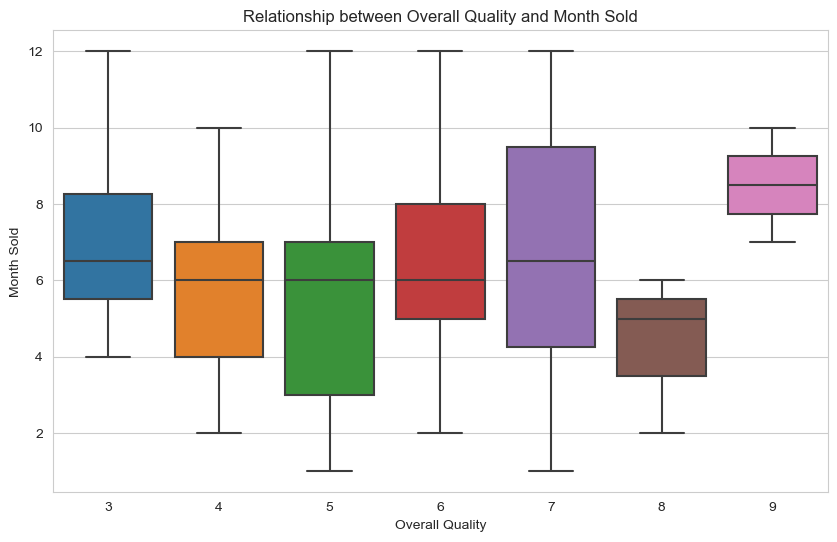

In [255]:

# Relationship between 'OverallQual' and 'MoSold'
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='MoSold', data=df)
plt.title('Relationship between Overall Quality and Month Sold')
plt.xlabel('Overall Quality')
plt.ylabel('Month Sold')
plt.show()


Here this graph utilizes a series of box plots to depict the distribution of sale months for properties categorized by their overall quality ratings, which range from 3 to 9. Each box plot corresponds to a specific quality rating and is color-coded for clearer differentiation. The vertical axis represents the month sold, ranging from 1 (January) to 12 (December), and the horizontal axis categorizes the properties by their overall quality scores.

Analyzing the box plots, it's evident that the median month sold varies somewhat with the quality of the property. For instance, properties with a quality rating of 3 tend to sell around the middle of the year, with a median selling month closer to June, similar to properties with quality ratings 4 through 6. Properties with higher quality ratings (7 to 9) display a wider range of selling months, particularly those rated 8, which show a median selling month later in the year and a broad interquartile range, indicating sales across a diverse set of months.

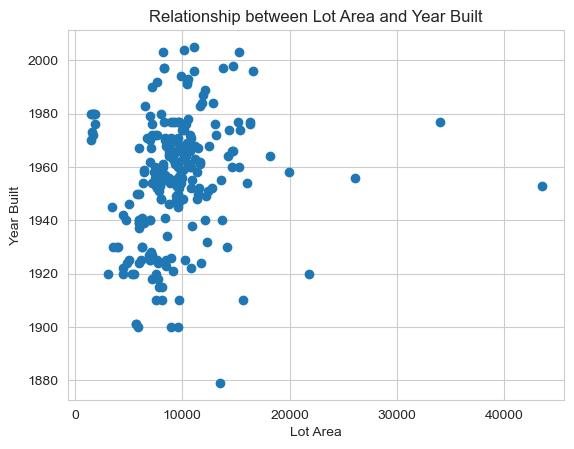

In [256]:
# How are the 'LotArea' and 'YearBuilt'related?
plt.scatter(df['LotArea'], df['YearBuilt'])
plt.title('Relationship between Lot Area and Year Built')
plt.xlabel('Lot Area')
plt.ylabel('Year Built')
plt.show()


This graph is a scatter plot that illustrates how the size of property lots (Lot Area) corresponds with the year those properties were constructed (Year Built). The vertical axis represents the year properties were built, ranging from the late 1800s to 2000, while the horizontal axis represents lot area in square feet, extending from 0 to approximately 40,000 square feet.

This visualization shows a dense clustering of data points primarily between the years 1940 and 2000, with lot sizes mostly ranging from small to medium (up to 20,000 square feet). There is a noticeable increase in lot sizes for properties built in the latter half of the 20th century, indicating a trend toward larger lot areas over time. However, there are also several outliers with significantly larger lots, particularly in more recent years, which suggests a variability in lot sizes that may be influenced by factors such as geographic location, zoning laws, or the intended use of the property (e.g., residential vs. commercial)

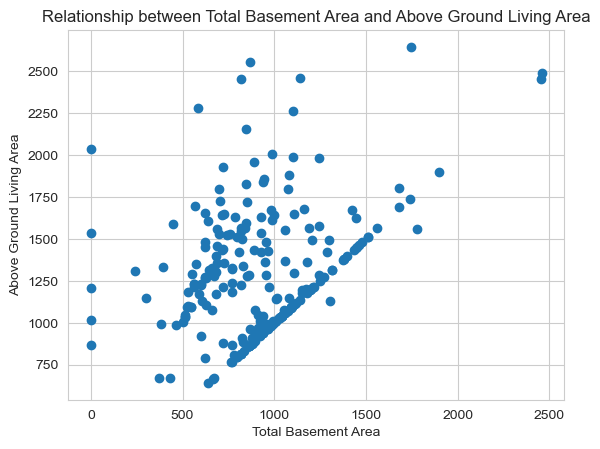

In [257]:
# Correlation between 'TotalBsmtSF' and 'GrLivArea'
plt.scatter(df['TotalBsmtSF'], df['GrLivArea'])
plt.title('Relationship between Total Basement Area and Above Ground Living Area')
plt.xlabel('Total Basement Area')
plt.ylabel('Above Ground Living Area')
plt.show()

This scatter plot depicts the correlation between the size of the basement area and the living space above ground in square feet. The x-axis represents the total basement area, while the y-axis corresponds to the above-ground living area. The data points, shown in blue, suggest a positive correlation between the two variables: as the basement area increases, there is a general trend for the above-ground living area to also increase. This trend is particularly evident in the cluster of data points that forms a linear pattern from the lower left to the upper right part of the plot. However, there are notable outliers, especially at higher basement sizes, where the above-ground living area varies more significantly. This variability could be due to architectural differences, property styles, or functional uses of space that differ substantially from one house to another. Overall, the graph provides useful insights into how the sizes of basements are typically matched with the living spaces above them, which can be crucial for real estate developers, architects, and potential homeowners when planning or evaluating property layouts

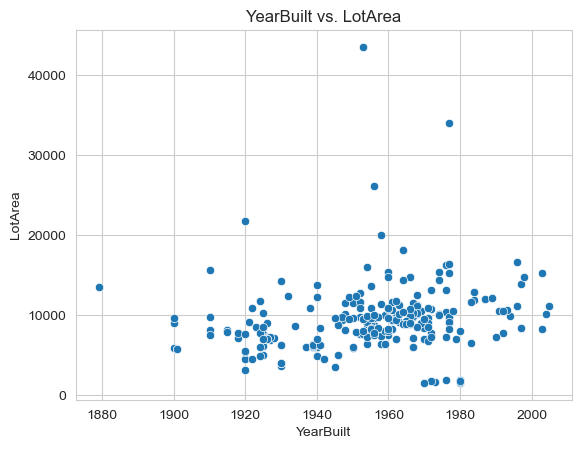

In [258]:
# Scatter plot of YearBuilt vs. LotArea
sns.scatterplot(x='YearBuilt', y='LotArea', data=df)
plt.title('YearBuilt vs. LotArea')
plt.xlabel('YearBuilt')
plt.ylabel('LotArea')
plt.show()


This scatter plot illustrates the relationship between the year properties were built and the size of their lots across different periods, from the late 19th century to the early 2000s. The x-axis represents the year built, and the y-axis represents the lot area in square feet. A concentration of data points is evident in the mid to late 20th century, indicating that most properties included in the dataset were constructed during this time. The lot sizes for these properties predominantly cluster below 10,000 square feet, suggesting a standard in lot sizing during these years.

However, there are several outliers, particularly properties with exceptionally large lot sizes that appear sporadically throughout the 20th century, suggesting that while the majority of properties were built on relatively smaller lots, a few were constructed on significantly larger parcels of land. Interestingly, there does not appear to be a clear trend or correlation between the year built and lot size, as large lot sizes are as likely to appear early in the 20th century as in later decades.

C:\Users\sdaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


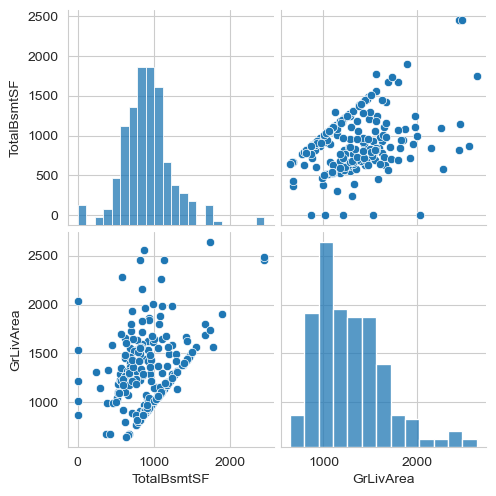

In [259]:

# Pairplot of TotalBsmtSF and GrLivArea
sns.pairplot(df[['TotalBsmtSF', 'GrLivArea']])
plt.show()


This is a matrix of scatter plots and histograms analyzing relationships and distributions involving the total basement square footage (TotalBsmtSF) and above-ground living area square footage (GrLivArea) of properties. The histograms on the diagonal show the distribution of TotalBsmtSF and GrLivArea separately. The TotalBsmtSF histogram reveals a bell-shaped distribution, indicating that most properties have basement sizes clustered around a central value, with fewer properties having extremely small or large basements. The GrLivArea histogram also shows a somewhat normal distribution but with a right skew, suggesting a significant number of properties with larger living areas.

The scatter plots in the off-diagonal positions examine the relationship between these two variables. The top-right plot, showing GrLivArea against TotalBsmtSF, illustrates a positive correlation where properties with larger basements tend to have larger above-ground living areas. This relationship is linear for the most part but shows some variability, especially for properties with larger living areas.

The bottom-left plot, which mirrors the top-right plot by plotting the same variables in reverse axes, reinforces this observation. Both scatter plots depict a trend where increases in basement size generally accompany increases in living area, although the spread of data points suggests that the exact increase in living area for each square foot of basement can vary.

# How does the average 'MoSold' vary across different levels of 'OverallQual'?
# Find the mean and median OverallQual score of each MoSold with groupby
# Find the mean and median voting score of each level with groupby

In [260]:
mean_median_voting_score = df.groupby('OverallQual')['MoSold'].agg(['mean', 'median'])

# Print mean and median separately
print("Mean MoSold for each OverallQual:")
print(mean_median_voting_score['mean'])


Mean MoSold for each OverallQual:
OverallQual
3    7.250000
4    5.739130
5    5.660870
6    6.486111
7    6.409091
8    4.333333
9    8.500000
Name: mean, dtype: float64


In [261]:
print("\nMedian MoSold for each OverallQual:")
print(mean_median_voting_score['median'])



Median MoSold for each OverallQual:
OverallQual
3    6.5
4    6.0
5    6.0
6    6.0
7    6.5
8    5.0
9    8.5
Name: median, dtype: float64


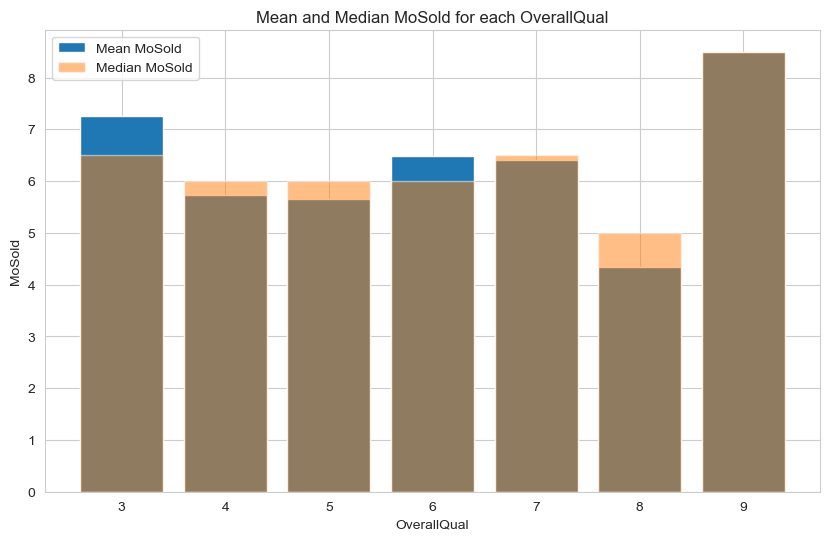

In [262]:
# Plotting the mean and median 'MoSold' for each 'OverallQual'
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting mean 'MoSold'
mean_plot = ax.bar(mean_median_voting_score.index, mean_median_voting_score['mean'], label='Mean MoSold')

# Plotting median 'MoSold'
median_plot = ax.bar(mean_median_voting_score.index, mean_median_voting_score['median'], label='Median MoSold', alpha=0.5)

# Adding labels, title, and legend
ax.set_xlabel('OverallQual')
ax.set_ylabel('MoSold')
ax.set_title('Mean and Median MoSold for each OverallQual')
ax.legend()

# Displaying the plot
plt.show()

This bar graph  visually compares the average (mean) and median months in which properties, categorized by their overall quality (OverallQual), are sold. The x-axis represents the overall quality rating ranging from 3 to 9, indicating a scale of property quality. The y-axis measures the month sold (MoSold), ranging from 1 (January) to 12 (December).

This chart shows that, generally, the median month sold (represented by orange bars) remains consistently around the spring to early summer months across all quality ratings, aligning with the common peak real estate seasons. The blue bars, representing the mean month sold, are very close to the median values, indicating a symmetric distribution of sale months around the median.

Notably, the properties with the highest quality rating (9) deviate from this pattern slightly, showing sales extending later into the year, which might suggest a longer selling period possibly due to their higher value and limited buyer pool. The consistency in the months properties are sold across varying quality ratings suggests that the timing of sales is more influenced by seasonal buying behaviors rather than the quality of the properties. This information can be particularly useful for sellers and real estate agents to plan market listings and understand seasonal impacts on property sales across different quality brackets.

In [263]:
 # How does the garage area (GarageArea) relate to the number of cars that can fit in the garage (GarageCars)?

In [264]:
summary_stats = df[['GarageArea', 'GarageCars']].describe()
(summary_stats)


,GarageArea,GarageCars
count,241.000000,241.000000
mean,393.481328,1.431535
std,182.392482,0.649103
min,0.000000,0.000000
25%,280.000000,1.000000
50%,364.000000,1.000000
75%,495.000000,2.000000
max,1488.000000,4.000000


In [265]:
mean_garage_area = df['GarageArea'].mean()
median_garage_area = df['GarageArea'].median()
mean_garage_cars = df['GarageCars'].mean()
median_garage_cars = df['GarageCars'].median()

print(f"Mean Garage Area: {mean_garage_area}")
print(f"Median Garage Area: {median_garage_area}")
print(f"Mean Garage Cars: {mean_garage_cars}")
print(f"Median Garage Cars: {median_garage_cars}")

Mean Garage Area: 393.4813278008299
Median Garage Area: 364.0
Mean Garage Cars: 1.4315352697095436
Median Garage Cars: 1.0


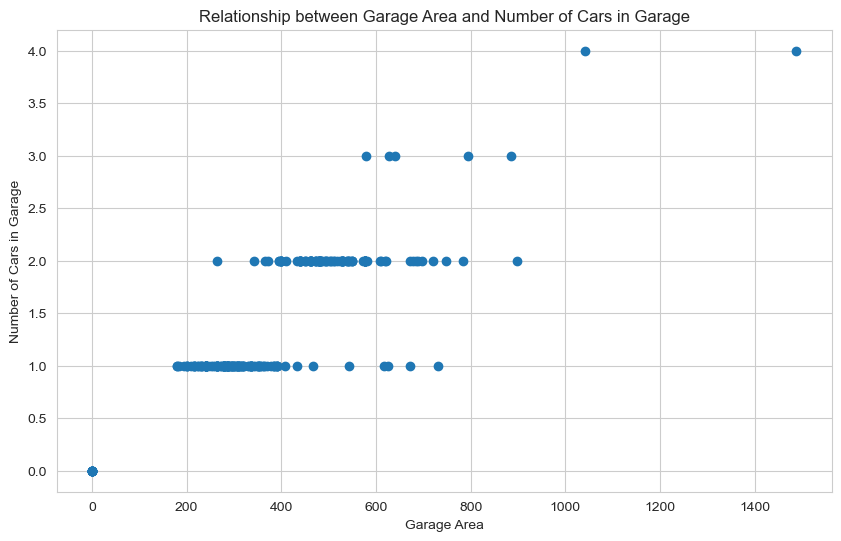

In [266]:
plt.figure(figsize=(10, 6))

# Scatter plot of GarageArea vs. GarageCars
plt.scatter(df['GarageArea'], df['GarageCars'])
plt.xlabel('Garage Area')
plt.ylabel('Number of Cars in Garage')
plt.title('Relationship between Garage Area and Number of Cars in Garage')
plt.grid(True)
plt.show()


The scatter plot  displays the correlation between the size of a garage, measured in square feet, and the capacity of the garage in terms of how many cars it can hold. The x-axis represents the garage area, and the y-axis represents the number of cars that can fit in the garage, with values ranging from 0 to 4 cars.

The plot reveals distinct groupings of data points that correspond to typical garage sizes for one, two, and three-car garages. Notably, there is a clear horizontal banding at each car capacity level, indicating standardized garage sizes for different numbers of cars. For example, garages designed to hold one car typically range from 0 to around 400 square feet. Two-car garages cluster around 400 to 600 square feet, and three-car garages tend to be between 600 and 1000 square feet, with a few exceptions extending slightly beyond this range.

In [267]:
# Calculate mean and median values
mean_garage_area = df['GarageArea'].mean()
median_garage_area = df['GarageArea'].median()
mean_garage_cars = df['GarageCars'].mean()
median_garage_cars = df['GarageCars'].median()


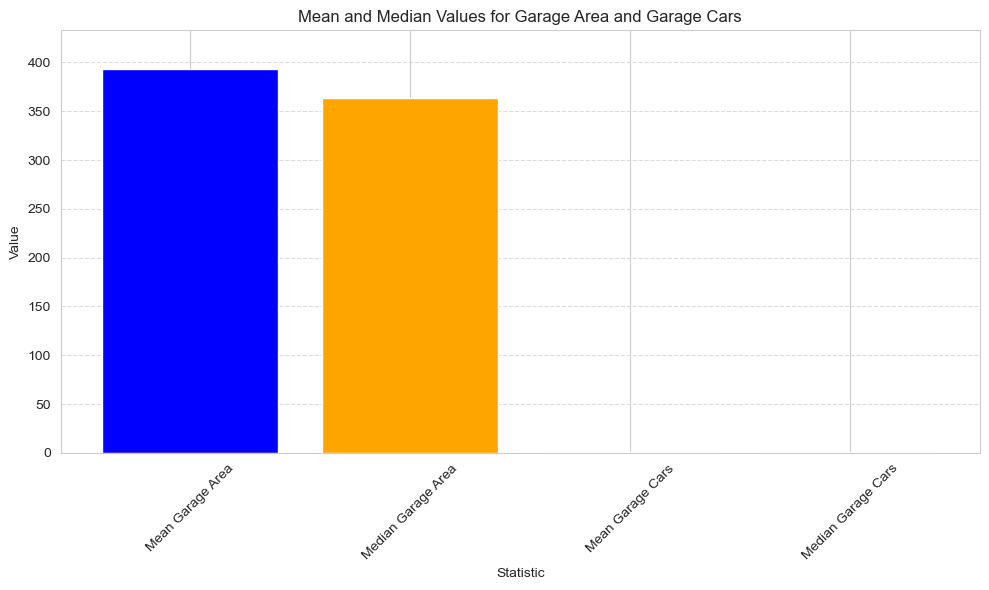

In [268]:

# Create a bar chart
labels = ['Mean Garage Area', 'Median Garage Area', 'Mean Garage Cars', 'Median Garage Cars']
values = [mean_garage_area, median_garage_area, mean_garage_cars, median_garage_cars]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Mean and Median Values for Garage Area and Garage Cars')
plt.ylim(0, max(values) * 1.1)  # Set y-axis limit to ensure values are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The bar chart  visually represents statistical data related to the dimensions and capacity of garages in a dataset. The x-axis categorizes the data into four groups: Mean Garage Area, Median Garage Area, Mean Garage Cars, and Median Garage Cars. The y-axis indicates the numerical values, which seem to represent square footage for the garage area and a count for the number of cars.

The chart displays a significant difference between the mean and median garage area, with the mean garage area shown in a taller blue bar, suggesting a higher average garage size possibly skewed by larger garages. In contrast, the median garage area in orange is slightly lower, indicating that the middle value in the sorted list of garage areas is less than the mean, hinting at a distribution that might be skewed by exceptionally large or small garages.